In [42]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [43]:
Folder = 'C:/Users/Dikla/Desktop/train/'

dog_train = [Folder+ dog for dog in os.listdir(Folder) if 'dog' in dog]
cat_train = [Folder+ cat for cat in os.listdir(Folder) if 'cat' in cat]

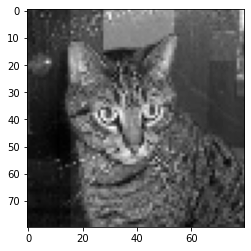

In [44]:
main_dir = "C:/Users/Dikla/Desktop/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)


p = os.listdir(path)[1]
img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

# making all images to gray scale 2D arrays

In [45]:
#dog_lists
img_array = cv2.imread(dog_train[0],cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, dsize=(80, 80))
img_array = img_array.ravel()
list_dog = pd.DataFrame(img_array)
for i in range (0, len(dog_train)):
    img_array = cv2.imread(dog_train[i],cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, dsize=(80, 80))
    img_array = img_array.ravel()
    list_dog[i] = img_array

In [46]:
list_dog = list_dog.T
list_dog

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,118,117,163,161,163,133,138,122,132,137,...,87,82,74,76,81,74,73,72,74,82
1,129,132,131,97,90,83,99,84,112,120,...,244,246,242,246,247,246,241,237,235,235
2,116,105,102,100,125,122,121,125,124,126,...,36,40,82,95,97,92,93,96,91,93
3,185,186,184,182,182,181,188,185,180,181,...,50,57,71,62,83,84,59,73,69,70
4,16,8,10,15,59,45,95,46,71,20,...,123,134,102,113,114,105,124,121,120,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,140,143,144,146,147,148,148,149,150,152,...,164,164,164,165,167,166,168,168,168,169
12496,106,78,112,98,120,57,107,76,71,61,...,79,84,101,91,95,81,79,75,97,74
12497,35,36,63,69,41,51,48,47,44,64,...,130,119,136,139,98,83,113,96,114,174
12498,255,249,237,223,202,167,121,72,61,72,...,114,97,109,115,104,103,125,110,109,120


In [47]:
#cat_lists
img_array = cv2.imread(cat_train[0],cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, dsize=(80, 80))
img_array = img_array.ravel()
list_cat = pd.DataFrame(img_array)
for i in range (0, len(cat_train)):
    img_array = cv2.imread(cat_train[i],cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, dsize=(80, 80))
    img_array = img_array.ravel()
    list_cat[i] = img_array

In [48]:
list_cat = list_cat.T
list_cat

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,169,174,180,184,188,191,196,198,201,203,...,3,3,3,3,2,2,2,2,2,2
1,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
2,42,38,45,46,58,57,54,59,48,51,...,88,126,156,165,137,135,149,162,171,154
3,220,224,225,230,223,228,230,225,228,227,...,236,232,228,204,204,203,216,221,212,213
4,114,120,115,88,96,139,127,185,130,196,...,105,101,91,95,92,97,120,89,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,23,21,21,21,20,19,20,20,21,...,67,73,78,72,78,71,83,78,64,78
12496,102,96,93,92,92,91,99,99,91,91,...,107,105,104,104,103,103,101,100,101,100
12497,96,95,98,95,105,95,94,99,115,137,...,255,255,254,254,254,254,254,254,254,254
12498,57,51,67,140,153,158,159,160,161,162,...,205,207,197,197,207,216,225,224,217,216


In [49]:
list_dog['label'] = 0
list_cat['label'] = 1

In [50]:
df0 = pd.concat([list_dog, list_cat],ignore_index = True)

In [51]:
df0

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,label
0,118,117,163,161,163,133,138,122,132,137,...,82,74,76,81,74,73,72,74,82,0
1,129,132,131,97,90,83,99,84,112,120,...,246,242,246,247,246,241,237,235,235,0
2,116,105,102,100,125,122,121,125,124,126,...,40,82,95,97,92,93,96,91,93,0
3,185,186,184,182,182,181,188,185,180,181,...,57,71,62,83,84,59,73,69,70,0
4,16,8,10,15,59,45,95,46,71,20,...,134,102,113,114,105,124,121,120,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,23,21,21,21,20,19,20,20,21,...,73,78,72,78,71,83,78,64,78,1
24996,102,96,93,92,92,91,99,99,91,91,...,105,104,104,103,103,101,100,101,100,1
24997,96,95,98,95,105,95,94,99,115,137,...,255,254,254,254,254,254,254,254,254,1
24998,57,51,67,140,153,158,159,160,161,162,...,207,197,197,207,216,225,224,217,216,1


In [52]:
df1 = df0.drop_duplicates()
df1

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,label
0,118,117,163,161,163,133,138,122,132,137,...,82,74,76,81,74,73,72,74,82,0
1,129,132,131,97,90,83,99,84,112,120,...,246,242,246,247,246,241,237,235,235,0
2,116,105,102,100,125,122,121,125,124,126,...,40,82,95,97,92,93,96,91,93,0
3,185,186,184,182,182,181,188,185,180,181,...,57,71,62,83,84,59,73,69,70,0
4,16,8,10,15,59,45,95,46,71,20,...,134,102,113,114,105,124,121,120,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,23,21,21,21,20,19,20,20,21,...,73,78,72,78,71,83,78,64,78,1
24996,102,96,93,92,92,91,99,99,91,91,...,105,104,104,103,103,101,100,101,100,1
24997,96,95,98,95,105,95,94,99,115,137,...,255,254,254,254,254,254,254,254,254,1
24998,57,51,67,140,153,158,159,160,161,162,...,207,197,197,207,216,225,224,217,216,1


In [53]:
#בגלל שזה תמונות אין ציפיה שיהיו נאנים
df1.isna().sum().sum()

0

In [54]:
X = df1.drop(['label'],axis = 1)
y = df1.label

In [55]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [56]:
#reset index again
df = X_train_2.reset_index()
df = df.drop(['index'], axis = 1)

y = y_train_2.reset_index()
y = y.drop(['index'], axis = 1)

### split again

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [58]:
y_train = y_train.values.ravel() # Transforming dataframe to 1Darry

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) + 1
print (d)

1007


In [ ]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');

In [60]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))

In [61]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))

In [67]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

KNeighborsClassifier()

In [68]:
#knnpca
pred = knnpca.predict(X_test_reduced)
print(accuracy_score(y_test, pred))

0.5656414103525882


In [69]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [70]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.5853963490872718


In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [72]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knnpca),("RF",clf),('gaussian-bayes',gnb)])

In [73]:
from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.5796449112278069


In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

0.5653913478369592


In [76]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

0.5716429107276819


In [77]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 1000,learning_rate = 0.1,use_label_encoder = False, eval_metric = "merror")

In [78]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.6356589147286822


In [79]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.6249062265566392


# Color Images

In [ ]:
   # img_array1 = img_array1.reshape((img_array1.shape[0]*img_array1.shape[1]), img_array1.shape[2])# 3D to 2D array
    #img_array1 = img_array1.transpose()# 3D to 2D array

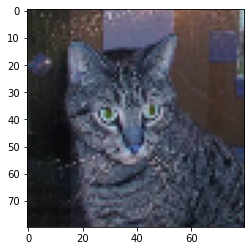

In [245]:
main_dir = "C:/Users/Dikla/Desktop/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)


p = os.listdir(path)[1]
img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_COLOR)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

In [251]:
#dog_lists
img_array = cv2.imread(dog_train[0],cv2.IMREAD_COLOR)
img_array = cv2.resize(img_array, dsize=(50, 50))
img_array = img_array.ravel()
list_dog = pd.DataFrame(img_array)
for i in range (0, len(dog_train)):
    img_array = cv2.imread(dog_train[i],cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, dsize=(50, 50))
    img_array = img_array.ravel()
    list_dog[i] = img_array

In [252]:
list_dog = list_dog.T
list_dog

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,122,108,110,163,161,161,163,158,157,141,...,69,80,78,68,85,80,71,83,78,69
1,58,94,135,57,95,139,35,58,81,49,...,249,227,244,247,213,236,238,214,236,234
2,55,108,139,50,99,134,95,117,127,100,...,100,81,96,99,83,95,101,80,92,98
3,179,185,196,175,181,192,171,176,191,173,...,80,56,68,86,50,62,80,57,63,83
4,14,13,15,3,6,13,55,40,47,51,...,132,113,121,138,106,114,131,105,113,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,107,144,148,110,147,151,113,150,154,114,...,178,132,168,178,134,169,179,135,170,180
12496,53,81,111,63,88,114,44,76,95,43,...,114,50,76,99,66,97,118,37,64,85
12497,45,48,53,50,53,58,51,53,54,41,...,111,134,175,213,27,76,117,126,171,217
12498,253,252,253,229,230,253,175,189,235,92,...,95,98,98,114,97,95,110,107,107,121


In [253]:
#cat_lists
img_array = cv2.imread(cat_train[0],cv2.IMREAD_COLOR)
img_array = cv2.resize(img_array, dsize=(50, 50))
img_array = img_array.ravel()
list_cat = pd.DataFrame(img_array)
for i in range (0, len(cat_train)):
    img_array = cv2.imread(cat_train[i],cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, dsize=(50, 50))
    img_array = img_array.ravel()
    list_cat[i] = img_array

In [254]:
list_cat = list_cat.T
list_cat

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,92,169,208,100,177,216,104,182,225,110,...,2,0,2,2,0,2,2,0,2,2
1,43,43,39,64,58,55,36,40,35,44,...,71,47,53,70,52,57,75,20,26,39
2,53,45,38,61,47,41,64,54,47,69,...,166,52,150,165,2,183,185,10,183,187
3,217,222,221,220,225,224,237,235,235,239,...,205,208,210,210,218,220,219,207,212,215
4,72,109,137,83,120,148,48,87,115,90,...,96,82,105,120,59,91,102,64,90,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,24,24,23,23,23,20,20,20,21,...,77,77,78,78,73,73,73,71,71,71
12496,114,102,94,104,92,84,102,95,79,112,...,117,100,95,116,98,93,114,101,95,116
12497,114,94,93,116,96,95,123,102,102,113,...,253,254,255,253,254,255,253,254,255,253
12498,56,56,62,54,56,58,152,151,137,163,...,199,226,217,209,238,226,216,236,223,209


In [255]:
list_dog['label'] = 0
list_cat['label'] = 1

In [256]:
df01 = pd.concat([list_dog, list_cat],ignore_index = True)

In [257]:
df01

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,label
0,122,108,110,163,161,161,163,158,157,141,...,80,78,68,85,80,71,83,78,69,0
1,58,94,135,57,95,139,35,58,81,49,...,227,244,247,213,236,238,214,236,234,0
2,55,108,139,50,99,134,95,117,127,100,...,81,96,99,83,95,101,80,92,98,0
3,179,185,196,175,181,192,171,176,191,173,...,56,68,86,50,62,80,57,63,83,0
4,14,13,15,3,6,13,55,40,47,51,...,113,121,138,106,114,131,105,113,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,24,24,23,23,23,20,20,20,21,...,77,78,78,73,73,73,71,71,71,1
24996,114,102,94,104,92,84,102,95,79,112,...,100,95,116,98,93,114,101,95,116,1
24997,114,94,93,116,96,95,123,102,102,113,...,254,255,253,254,255,253,254,255,253,1
24998,56,56,62,54,56,58,152,151,137,163,...,226,217,209,238,226,216,236,223,209,1


In [259]:
df02 = df01.drop_duplicates()
df02

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,label
0,122,108,110,163,161,161,163,158,157,141,...,80,78,68,85,80,71,83,78,69,0
1,58,94,135,57,95,139,35,58,81,49,...,227,244,247,213,236,238,214,236,234,0
2,55,108,139,50,99,134,95,117,127,100,...,81,96,99,83,95,101,80,92,98,0
3,179,185,196,175,181,192,171,176,191,173,...,56,68,86,50,62,80,57,63,83,0
4,14,13,15,3,6,13,55,40,47,51,...,113,121,138,106,114,131,105,113,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,24,24,23,23,23,20,20,20,21,...,77,78,78,73,73,73,71,71,71,1
24996,114,102,94,104,92,84,102,95,79,112,...,100,95,116,98,93,114,101,95,116,1
24997,114,94,93,116,96,95,123,102,102,113,...,254,255,253,254,255,253,254,255,253,1
24998,56,56,62,54,56,58,152,151,137,163,...,226,217,209,238,226,216,236,223,209,1


In [260]:
df02.isna().sum().sum()

0

In [261]:
X = df02.drop(['label'],axis = 1)
y = df02.label

In [262]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [263]:
#reset index again
df = X_train_2.reset_index()
df = df.drop(['index'], axis = 1)

y = y_train_2.reset_index()
y = y.drop(['index'], axis = 1)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [266]:
y_train = y_train.values.ravel() # Transforming dataframe to 1Darry

In [267]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) + 1
print (d)

958


In [ ]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');

In [269]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))

In [271]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))

In [272]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

KNeighborsClassifier()

In [273]:
#knnpca
pred = knnpca.predict(X_test_reduced)
print(accuracy_score(y_test, pred))


0.5768942235558889


In [274]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [275]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.6009002250562641


In [276]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [277]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knnpca),("RF",clf),('gaussian-bayes',gnb)])

In [278]:
from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.6019004751187796


In [279]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

0.5911477869467366


In [280]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

0.5911477869467366


In [293]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 2000,learning_rate = 0.04,use_label_encoder = False, eval_metric = "merror")

In [ ]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

In [284]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.6446611652913228


In [ ]:
#X_test_2,y_test_2